# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

   Dataset: https://www.kaggle.com/datasets/adityadesai13/used-car-dataset-ford-and-mercedes/data (mengambil merk bmw)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [88]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [89]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [90]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [92]:
df.shape

(10781, 9)

In [93]:
df.isnull().sum()

,0
model,0
year,0
price,0
transmission,0
mileage,0
fuelType,0
tax,0
mpg,0
engineSize,0


In [94]:
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")


Jumlah Data Duplikat: 117


In [95]:
num_cols = df.select_dtypes(include=["int64", "float64"])
cat_cols = df.select_dtypes(include=['object'])

In [96]:
# Hitung Z-score
z_scores = np.abs(stats.zscore(num_cols, nan_policy='omit'))

# Jumlah outlier per kolom (threshold = 3)
jumlah_outlier_awal = (z_scores > 3).sum(axis=0)

outlier_awal = pd.Series(
    jumlah_outlier_awal,
    index=num_cols.columns,
    name='outlier_sebelum'
).sort_values(ascending=False)

outlier_awal

,outlier_sebelum
price,201
year,162
engineSize,135
mileage,117
mpg,95
tax,79


In [97]:
# Hitung jumlah nilai 0
zero_counts = (num_cols == 0).sum()
zero_counts[zero_counts > 0]

,0
tax,340
engineSize,47


In [98]:
zero_ratio = (num_cols == 0).mean() * 100
zero_ratio[zero_ratio > 0]

,0
tax,3.153696
engineSize,0.435952


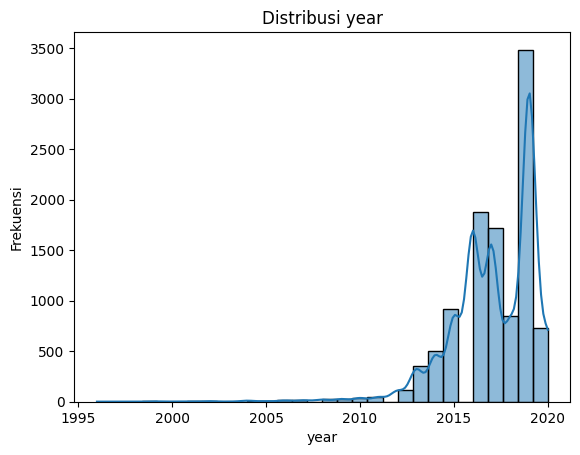

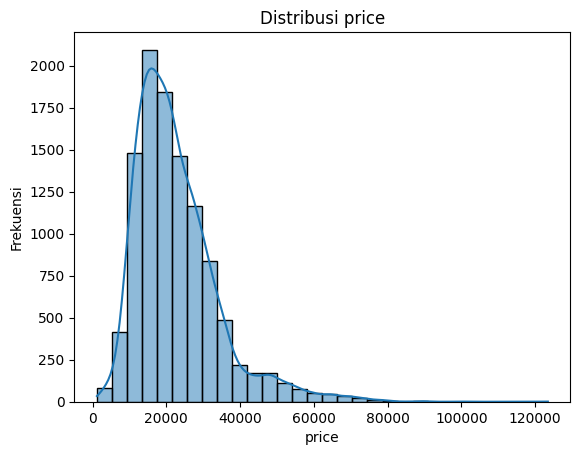

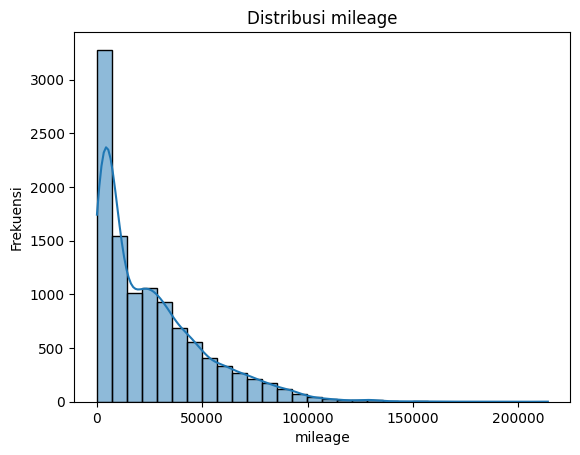

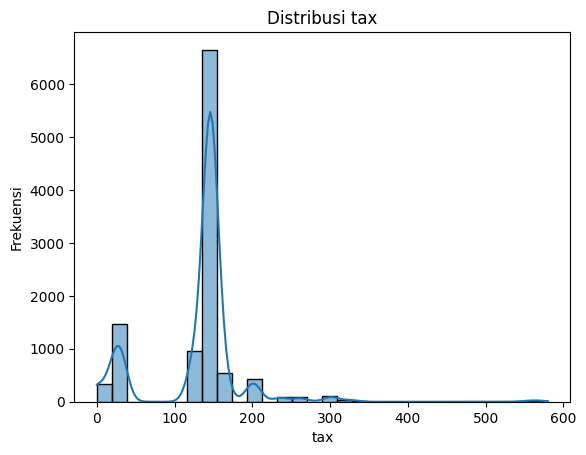

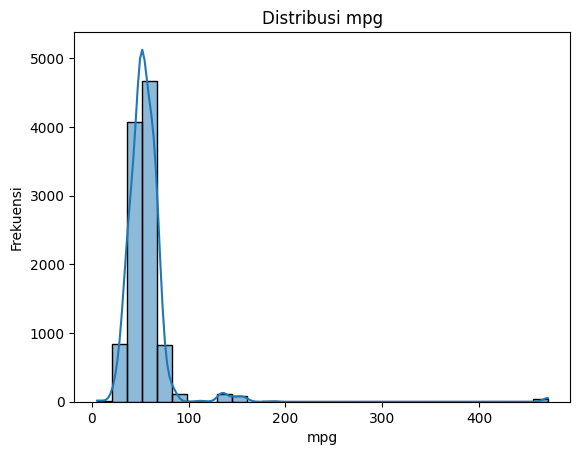

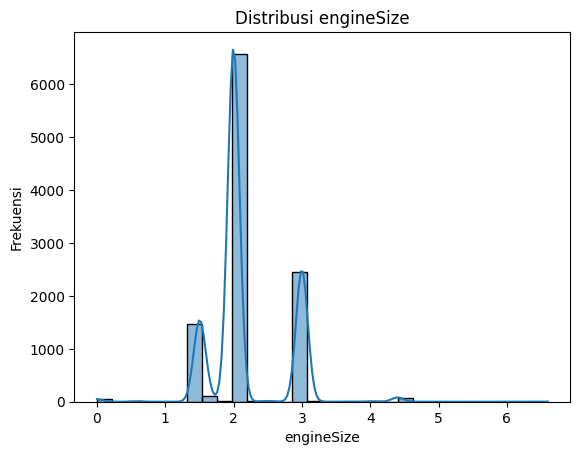

In [99]:
for col in num_cols:
    plt.figure()
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.show()

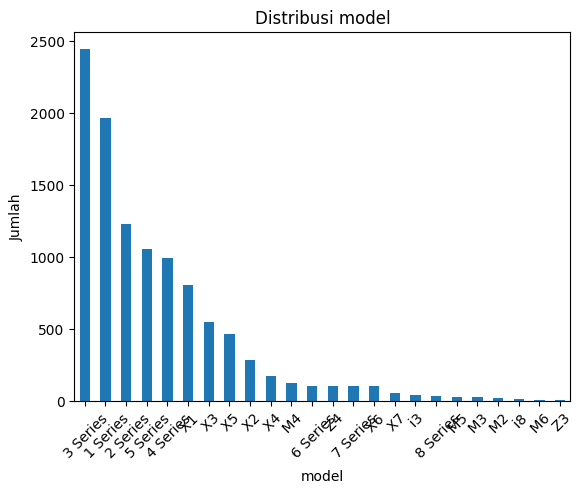

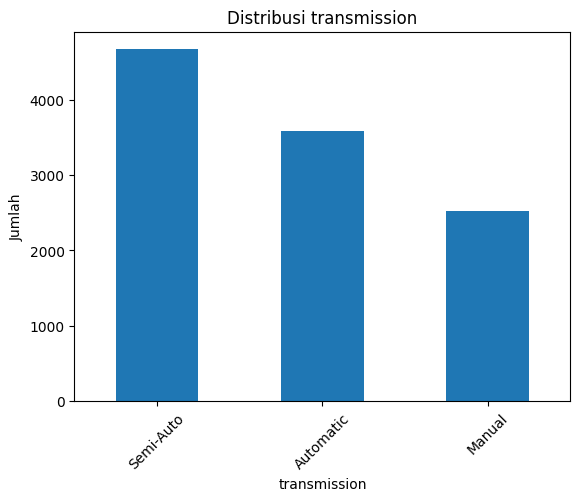

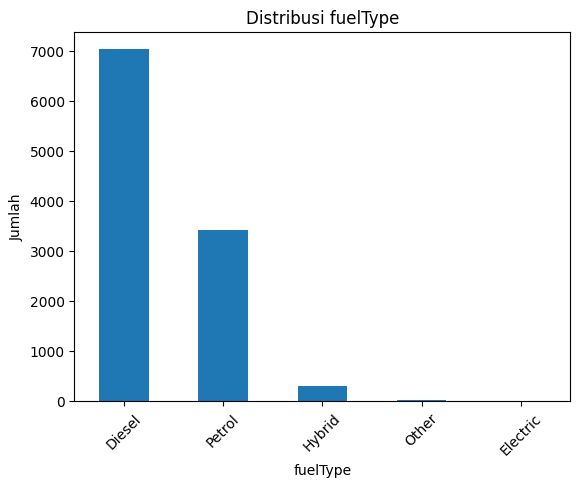

In [100]:
for col in cat_cols:
    plt.figure()
    df[col].value_counts().plot(kind='bar')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Jumlah')
    plt.xticks(rotation=45)
    plt.show()

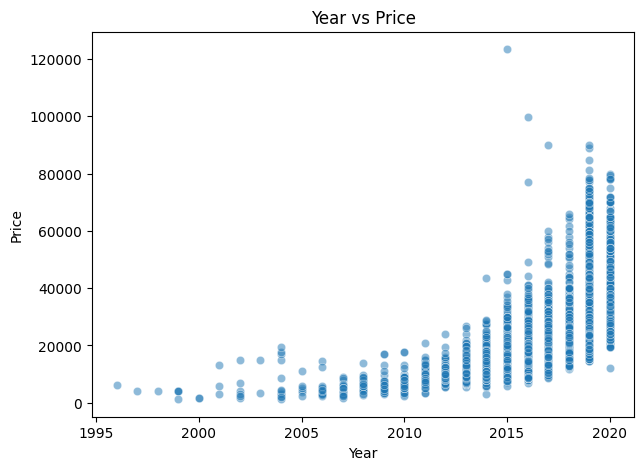

In [101]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="year", y="price", alpha=0.5)
plt.title("Year vs Price")
plt.xlabel("Year")
plt.ylabel("Price")
plt.show()

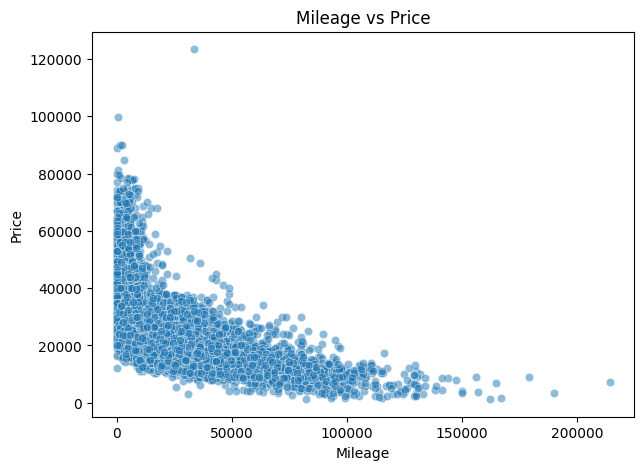

In [102]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="mileage", y="price", alpha=0.5)
plt.title("Mileage vs Price")
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.show()

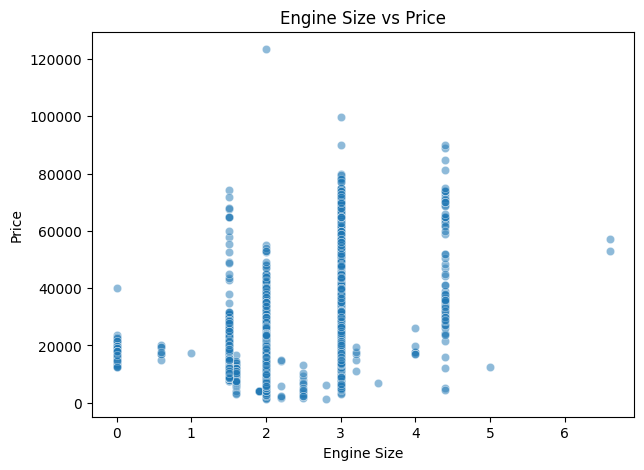

In [103]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x="engineSize", y="price", alpha=0.5)
plt.title("Engine Size vs Price")
plt.xlabel("Engine Size")
plt.ylabel("Price")
plt.show()

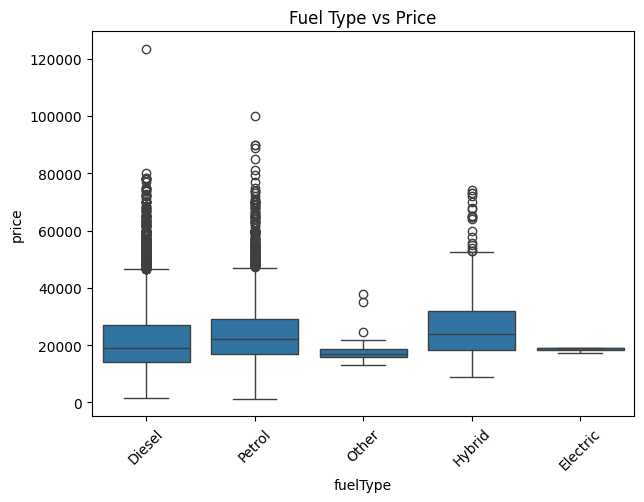

In [104]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="fuelType", y="price")
plt.title("Fuel Type vs Price")
plt.xticks(rotation=45)
plt.show()

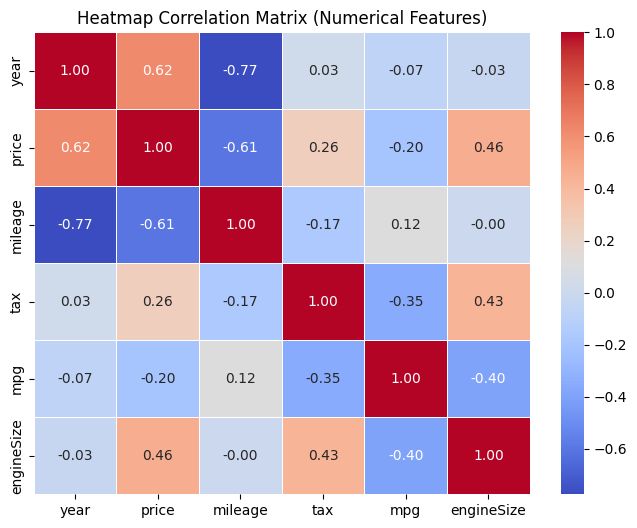

In [105]:
# Hitung correlation matrix
corr_matrix = num_cols.corr()

# Visualisasi heatmap
plt.figure(figsize=(8,6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Heatmap Correlation Matrix (Numerical Features)")
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [106]:
df = df.drop_duplicates()
print(f"\nJumlah Data Duplikat: {df.duplicated().sum()}")


Jumlah Data Duplikat: 0


In [107]:
# Identifikasi baris engineSize = 0
engine_zero_rows = df.loc[df["engineSize"] == 0]

# Hitung median tanpa nilai 0
median_engine_size = df.loc[df["engineSize"] > 0, "engineSize"].median()

# Ganti nilai 0 dengan median
df.loc[df["engineSize"] == 0, "engineSize"] = median_engine_size

# Tampilkan hasil setelah penggantian
df.loc[engine_zero_rows.index].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
621,i3,2017,19998,Automatic,41949,Hybrid,140,470.8,2.0
778,i3,2017,19998,Automatic,41146,Hybrid,0,470.8,2.0
780,i3,2017,21898,Automatic,10839,Hybrid,0,470.8,2.0
1866,i3,2017,19980,Automatic,26965,Hybrid,140,470.8,2.0
2352,i3,2016,19490,Automatic,8421,Hybrid,0,470.8,2.0


In [108]:
num_cols = ["price", "mileage", "tax", "mpg", "engineSize"]

def remove_outliers_iqr(data, columns):
    df_clean = data.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df_clean = df_clean[
            (df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)
        ]
    return df_clean

df = remove_outliers_iqr(df, num_cols)
print("Jumlah data setelah hapus outlier:", df.shape)

Jumlah data setelah hapus outlier: (4805, 9)


In [109]:
df_encoded = pd.get_dummies(
    df,
    columns=["model", "transmission", "fuelType"],
    drop_first=True
)
df_encoded.head()

,year,price,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,...,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ Z4,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,2014,11200,67068,125,57.6,2.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2018,27000,14827,145,42.8,2.0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
5,2016,14900,35309,125,60.1,2.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
6,2017,16000,38538,125,60.1,2.0,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
10,2017,15500,74907,145,52.3,2.0,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False


In [110]:
print("Jumlah kolom sebelum encoding:", df.shape[1])
print("Jumlah kolom sesudah encoding:", df_encoded.shape[1])


Jumlah kolom sebelum encoding: 9
Jumlah kolom sesudah encoding: 21


In [111]:
X = df_encoded.drop(columns="price")
y = df_encoded["price"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Konversi hasil scaling ke DataFrame
X_scaled_df = pd.DataFrame(
    X_scaled,
    columns=X.columns
)

# Tampilkan 5 baris pertama
X_scaled_df.head()

,year,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,model_ X1,model_ X2,model_ X3,model_ X4,model_ X5,model_ Z4,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol
0,-1.857287,2.332027,-2.318499,0.393071,0.0,-0.347231,-0.602916,-0.373773,2.778580,-0.054057,-0.396226,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,-0.601953
1,0.154268,-0.215159,0.088802,-1.392232,0.0,-0.347231,-0.602916,-0.373773,-0.359896,18.499035,-0.396226,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,1.661259
2,-0.851509,0.783510,-2.318499,0.694642,0.0,-0.347231,-0.602916,-0.373773,2.778580,-0.054057,-0.396226,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,-0.601953
3,-0.348621,0.940951,-2.318499,0.694642,0.0,-0.347231,-0.602916,-0.373773,2.778580,-0.054057,-0.396226,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,-0.601953
4,-0.348621,2.714243,0.088802,-0.246260,0.0,-0.347231,-0.602916,-0.373773,-0.359896,-0.054057,-0.396226,-0.23378,3.524456,-0.13012,-0.052085,-0.115263,2.316083,-1.081342,-0.091622,-0.601953


In [112]:
output_dir = "bmw_preprocessing"
os.makedirs(output_dir, exist_ok=True)

processed_df = X_scaled_df.copy()
processed_df["price"] = y.values

processed_df.head()

,year,mileage,tax,mpg,engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,model_ 5 Series,model_ 6 Series,...,model_ X2,model_ X3,model_ X4,model_ X5,model_ Z4,transmission_Manual,transmission_Semi-Auto,fuelType_Hybrid,fuelType_Petrol,price
0,-1.857287,2.332027,-2.318499,0.393071,0.0,-0.347231,-0.602916,-0.373773,2.778580,-0.054057,...,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,-0.601953,11200
1,0.154268,-0.215159,0.088802,-1.392232,0.0,-0.347231,-0.602916,-0.373773,-0.359896,18.499035,...,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,1.661259,27000
2,-0.851509,0.783510,-2.318499,0.694642,0.0,-0.347231,-0.602916,-0.373773,2.778580,-0.054057,...,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,-0.601953,14900
3,-0.348621,0.940951,-2.318499,0.694642,0.0,-0.347231,-0.602916,-0.373773,2.778580,-0.054057,...,-0.23378,-0.283732,-0.13012,-0.052085,-0.115263,-0.431764,-1.081342,-0.091622,-0.601953,16000
4,-0.348621,2.714243,0.088802,-0.246260,0.0,-0.347231,-0.602916,-0.373773,-0.359896,-0.054057,...,-0.23378,3.524456,-0.13012,-0.052085,-0.115263,2.316083,-1.081342,-0.091622,-0.601953,15500


In [113]:
processed_df.columns = (
    processed_df.columns
      # 1. Hilangkan spasi setelah underscore: "_ 2" → "_2"
      .str.replace(r"_\s+", "_", regex=True)

      # 2. Ganti spasi di tengah kata jadi underscore
      .str.replace(r"\s+", "_", regex=True)

      # 3. Ganti dash "-" jadi underscore "_"
      .str.replace("-", "_", regex=False)

      # 4. Lowercase (opsional tapi recommended)
      .str.lower()
)

In [114]:
processed_df.columns.tolist()

['year',
 'mileage',
 'tax',
 'mpg',
 'enginesize',
 'model_2_series',
 'model_3_series',
 'model_4_series',
 'model_5_series',
 'model_6_series',
 'model_x1',
 'model_x2',
 'model_x3',
 'model_x4',
 'model_x5',
 'model_z4',
 'transmission_manual',
 'transmission_semi_auto',
 'fueltype_hybrid',
 'fueltype_petrol',
 'price']

In [115]:
output_path = os.path.join(
    output_dir,
    "bmw_preprocessed.csv"
)

processed_df.to_csv(output_path, index=False)

print(f"Dataset berhasil disimpan di: {output_path}")

Dataset berhasil disimpan di: bmw_preprocessing/bmw_preprocessed.csv
